<center><img src="https://i.imgur.com/YNtjmbq.png" width="800"></center> 

<div class="alert alert-info" role="alert">
    
## Data para la sesión

Para esta sesión, los datos puedes descargarlos en _tu_ carpeta **data** desde este [enlace](https://drive.google.com/drive/folders/1n5z4r2LAAXuEPC5chq5sZkHf5I3QcUKX?usp=sharing).
</div>



# Práctica 4 – Visualización de Propiedades de la red

[VosViewer](https://www.vosviewer.com/) es un servicio de analisis de datos bibliográficos. En esta [carpeta](https://drive.google.com/drive/folders/1I48Vani9iBX-AdEbXH-qCsbinH2t8oEj?usp=sharing) encontrarás tres archivos sobre la red _journal_. Usemos uno de ellos:

In [1]:
import networkx as nx

journal=nx.read_graphml("data/journal.graphml")

Esta es una red que representa citadas entre journals. No es la red total, lo que se tiene es:

In [2]:
len(journal.edges), len(journal.nodes)

(4112, 232)

These are attributes present in the nodes and edges:

In [130]:
[x.keys() for x in journal.nodes.values()][0]

dict_keys(['label', 'description', 'cluster', 'x', 'y', 'issn', 'citations', 'pagerank', 'betweenness', 'diameter'])

In [4]:
# simple version
{k for node in journal.edges for k in journal.edges[node].keys()}

{'id', 'weight'}

In [5]:
nx.is_directed(journal)

True

¿Tendremos algun journal  que no siga a otro ni sea seguido por otro?

In [6]:
list(nx.isolates(journal))

[]

In [7]:
nx.overall_reciprocity(journal)

0.0

In [8]:
import pandas as pd
pd.DataFrame.from_dict(nx.reciprocity(journal,nodes=journal.nodes),orient='index').sort_values(0,ascending=False)

,0
1,0.0
160,0.0
148,0.0
149,0.0
150,0.0
...,...
82,0.0
83,0.0
84,0.0
85,0.0


Cada nodo puede conectarse con otro nodo?

In [9]:
nx.is_strongly_connected(journal)

False

In [10]:
# nx.average_shortest_path_length(journal)
# nx.eccentricity(journal)

In [11]:
nx.number_strongly_connected_components(journal)

232

In [12]:
# calcular los geodesicos para cada nodo
geodesics = dict(nx.all_pairs_shortest_path_length(journal))

# formatear geodesicos como matriz
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in journal.nodes] for n in journal.nodes]

# formatear matriz de geodesicos como dataframe
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=journal.nodes, columns=journal.nodes)

#tenemos
MatrixGeo_DF

,1,2,3,4,5,6,7,8,9,10,...,223,224,225,226,227,228,229,230,231,232
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,NaN,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
3,NaN,NaN,0.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,NaN,NaN,NaN,0.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
5,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,1.0
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,1.0
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [13]:
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

,freq
valor,
0.0,232.0
1.0,4112.0
2.0,10007.0
3.0,4637.0
4.0,1314.0
5.0,371.0
6.0,68.0
7.0,16.0
8.0,3.0


In [14]:
MatrixGeo_DF.max().max()

8.0

In [140]:
[(x,y.keys(),y.values()) for x,y in zip(geodesics.keys(),geodesics.values()) if 8 in y.values()]

[('132',
  dict_keys(['132', '151', '180', '221', '222', '154', '162', '174', '195', '226', '228', '231', '232', '161', '163', '169', '210', '192', '216', '197', '229', '168', '177', '178', '201', '209', '213', '225', '204', '205', '200', '173', '185', '214', '220', '230', '219', '179', '186', '202', '198', '211', '218', '223']),
  dict_values([0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 8, 8, 8]))]

In [18]:
nx.shortest_path(journal, source='132', target='211'),\
nx.shortest_path(journal, source='132', target='218'),\
nx.shortest_path(journal, source='132', target='223')

(['132', '151', '154', '161', '168', '173', '186', '198', '211'],
 ['132', '151', '154', '161', '168', '173', '186', '198', '218'],
 ['132', '151', '154', '161', '168', '173', '186', '198', '223'])

In [98]:

diam1_dict={k:100 if k in nx.shortest_path(journal, source='132', target='211')  else 0  for  k,v in zip(list(journal),np.ones(len(journal.nodes))) }
diam2_dict={k:10 if k in nx.shortest_path(journal, source='132', target='218')  else 0  for  k,v in zip(list(journal),np.ones(len(journal.nodes))) }
diam3_dict={k:1 if k in nx.shortest_path(journal, source='132', target='223')  else 0  for  k,v in zip(list(journal),np.ones(len(journal.nodes))) }

diam_1=pd.Series(diam1_dict,name='diam_1')

In [19]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(journal))
shortest_path_lengths['132']['211'] 

8

In [20]:
import numpy as np

average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

1.8354350472930312

In [21]:
nx.density(journal)

0.0767278698313181

Tamaño promedio del vecindario:

In [16]:
(sorted(journal.in_degree, key=lambda item: item[1], reverse=True))[:8]

[('115', 38),
 ('144', 36),
 ('150', 36),
 ('127', 34),
 ('163', 34),
 ('175', 33),
 ('121', 32),
 ('137', 30)]

In [17]:
(sorted(journal.out_degree, key=lambda item: item[1], reverse=True))[:8]

[('2', 114),
 ('5', 111),
 ('4', 93),
 ('3', 90),
 ('11', 84),
 ('15', 82),
 ('1', 78),
 ('6', 78)]

In [163]:
import pandas as pd

indegree_dict=dict(journal.in_degree())
indegree=pd.Series(indegree_dict,name='indegree')

outdegree_dict=dict(journal.out_degree())
outdegree=pd.Series(outdegree_dict,name='outdegree')


indegree.mean(),outdegree.mean()

(17.724137931034484, 17.724137931034484)

In [156]:
h_dict,a_dict=nx.hits(journal)
HITS_hubs=pd.Series(h_dict,name='HITS_hubs')
HITS_authorities=pd.Series(a_dict,name="HITS_authorities")
pd.concat([HITS_hubs,HITS_authorities],axis=1)

,HITS_hubs,HITS_authorities
1,0.033161,-0.000000
2,0.083688,0.000103
3,0.182790,0.006601
4,0.064329,0.002634
5,0.030963,0.012210
...,...,...
228,0.000013,0.000891
229,0.000013,0.000674
230,-0.000000,0.001219
231,0.000019,0.000502


In [24]:
pagerank_dict=nx.pagerank(journal)

Pagerank=pd.Series(pagerank_dict,name='Pagerank')
Pagerank

1      0.001480
2      0.001483
3      0.001535
4      0.001495
5      0.001650
         ...   
228    0.017221
229    0.012053
230    0.005440
231    0.028470
232    0.052718
Name: Pagerank, Length: 232, dtype: float64

In [25]:
components_dict={u:i for i,node_set in enumerate(nx.strongly_connected_components(journal)) for u in node_set}

components=pd.Series(components_dict,name='components')
components

213      0
225      1
209      2
222      3
210      4
      ... 
5      227
4      228
3      229
2      230
1      231
Name: components, Length: 232, dtype: int64

In [26]:
closeness_centrality_in_dict=nx.closeness_centrality(journal,distance=None)
closeness_centrality_out_dict=nx.closeness_centrality(journal.reverse(),distance=None)
betweenness_centrality_dict=nx.betweenness_centrality(journal)

closeness_centrality_in= pd.Series(closeness_centrality_in_dict,name='INcloseness')
closeness_centrality_out= pd.Series(closeness_centrality_out_dict,name='OUTcloseness')
betweenness_centrality= pd.Series(betweenness_centrality_dict,name='betweenness')

In [164]:
# lista de medidas calculadas
medidas=[indegree,outdegree, closeness_centrality_in,closeness_centrality_out,diam_1,betweenness_centrality, HITS_authorities,HITS_hubs, Pagerank] 

# data frame con todo
medidasJournal=pd.concat(medidas,axis=1).fillna(0) # 0 si hay vacíos
medidasJournal

,indegree,outdegree,INcloseness,OUTcloseness,diam_1,betweenness,HITS_authorities,HITS_hubs,Pagerank
1,0,78,0.000000,0.600000,0,0.000000,-0.000000,0.033161,0.001480
2,1,114,0.004329,0.661862,0,0.000314,0.000103,0.083688,0.001483
3,2,90,0.008658,0.613560,0,0.000217,0.006601,0.182790,0.001535
4,3,93,0.012987,0.616545,0,0.000446,0.002634,0.064329,0.001495
5,4,111,0.017316,0.650348,0,0.000913,0.012210,0.030963,0.001650
...,...,...,...,...,...,...,...,...,...
228,25,2,0.349804,0.008658,0,0.000163,0.000891,0.000013,0.017221
229,24,2,0.320802,0.008658,0,0.000259,0.000674,0.000013,0.012053
230,11,0,0.282931,0.000000,0,0.000000,0.001219,-0.000000,0.005440
231,26,1,0.356570,0.004329,0,0.000000,0.000502,0.000019,0.028470


In [202]:
medidasJournal['zeroDegree']=pd.Series(2*(medidasJournal.outdegree==0) + 1*(medidasJournal.indegree==0),name='zerodegree')
medidasJournal

,indegree,outdegree,INcloseness,OUTcloseness,diam_1,betweenness,HITS_authorities,HITS_hubs,Pagerank,zeroDegree
1,0,78,0.000000,0.600000,0,0.000000,-0.000000,0.033161,0.001480,1
2,1,114,0.004329,0.661862,0,0.000314,0.000103,0.083688,0.001483,0
3,2,90,0.008658,0.613560,0,0.000217,0.006601,0.182790,0.001535,0
4,3,93,0.012987,0.616545,0,0.000446,0.002634,0.064329,0.001495,0
5,4,111,0.017316,0.650348,0,0.000913,0.012210,0.030963,0.001650,0
...,...,...,...,...,...,...,...,...,...,...
228,25,2,0.349804,0.008658,0,0.000163,0.000891,0.000013,0.017221,0
229,24,2,0.320802,0.008658,0,0.000259,0.000674,0.000013,0.012053,0
230,11,0,0.282931,0.000000,0,0.000000,0.001219,-0.000000,0.005440,2
231,26,1,0.356570,0.004329,0,0.000000,0.000502,0.000019,0.028470,0


In [44]:
node_cut=nx.minimum_node_cut(journal)
edge_cut=nx.minimum_edge_cut(journal)
len(node_cut),len(edge_cut)

(0, 0)

In [207]:
pgAttr={k:v for k,v in zip(list(journal),medidasJournal.Pagerank)}
hithubAttr={k:v for k,v in zip(list(journal),medidasJournal.HITS_hubs)}
bwAttr={k:v for k,v in zip(list(journal),medidasJournal.betweenness)}
dim1Attr={k:v for k,v in zip(list(journal),medidasJournal.diam_1)}
zerodegAttr={k:v for k,v in zip(list(journal),medidasJournal.zeroDegree)}


nx.set_node_attributes(journal, pgAttr, name='pagerank')
nx.set_node_attributes(journal, hithubAttr, name='hithub')
nx.set_node_attributes(journal, bwAttr, name='betweenness')
nx.set_node_attributes(journal, dim1Attr, name='diameter')
nx.set_node_attributes(journal, zerodegAttr, name='zerodegree')

In [208]:
[x.keys() for x in journal.nodes.values()][0]

dict_keys(['label', 'description', 'cluster', 'x', 'y', 'issn', 'citations', 'pagerank', 'betweenness', 'diameter', 'hithub', 'zerodegree'])

### <div class="alert alert-success" role="alert">Hairballs </div>


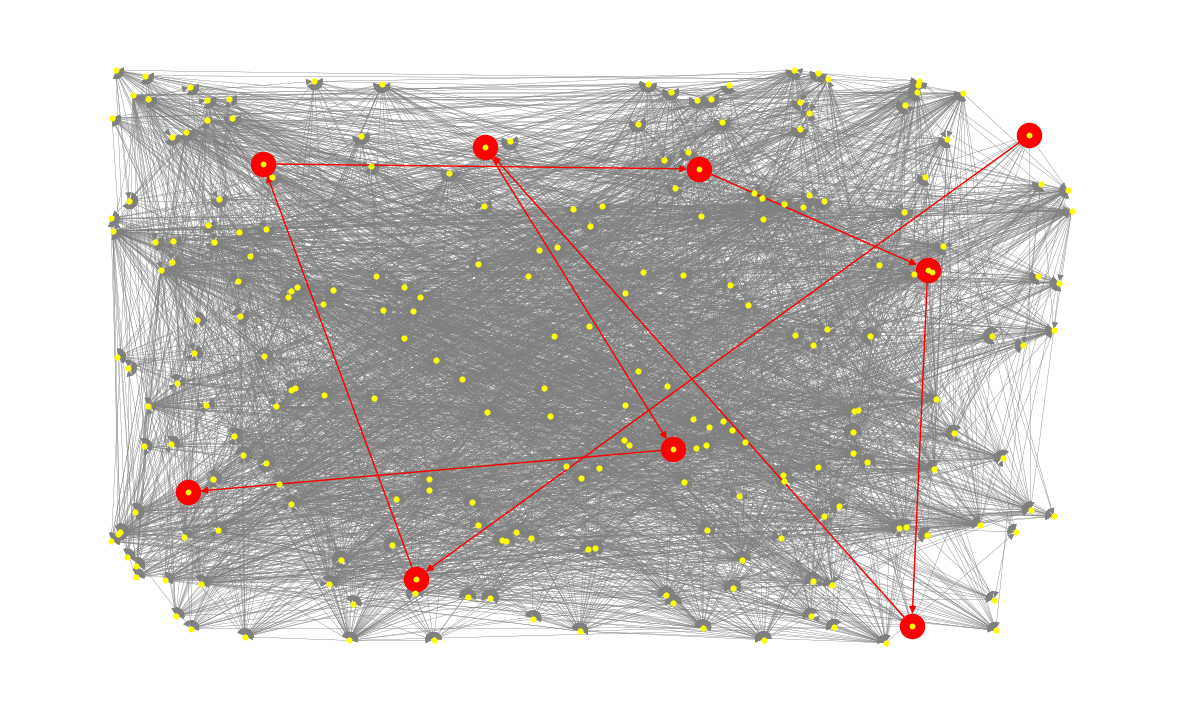

In [150]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
pos=nx.random_layout(journal)
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15,'edge_color':'grey','node_color':'yellow'}
nx.draw_networkx(journal, pos=pos, ax=ax, **plot_options)

path = nx.shortest_path(journal, source='132', target='223') # '223'
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(journal,pos,nodelist=path,node_color='r')
nx.draw(journal, pos=pos,ax=ax,**plot_options)
nx.draw_networkx_edges(journal,pos,edgelist=path_edges,edge_color='r',width=1)
#plt.axis('equal')
plt.show()

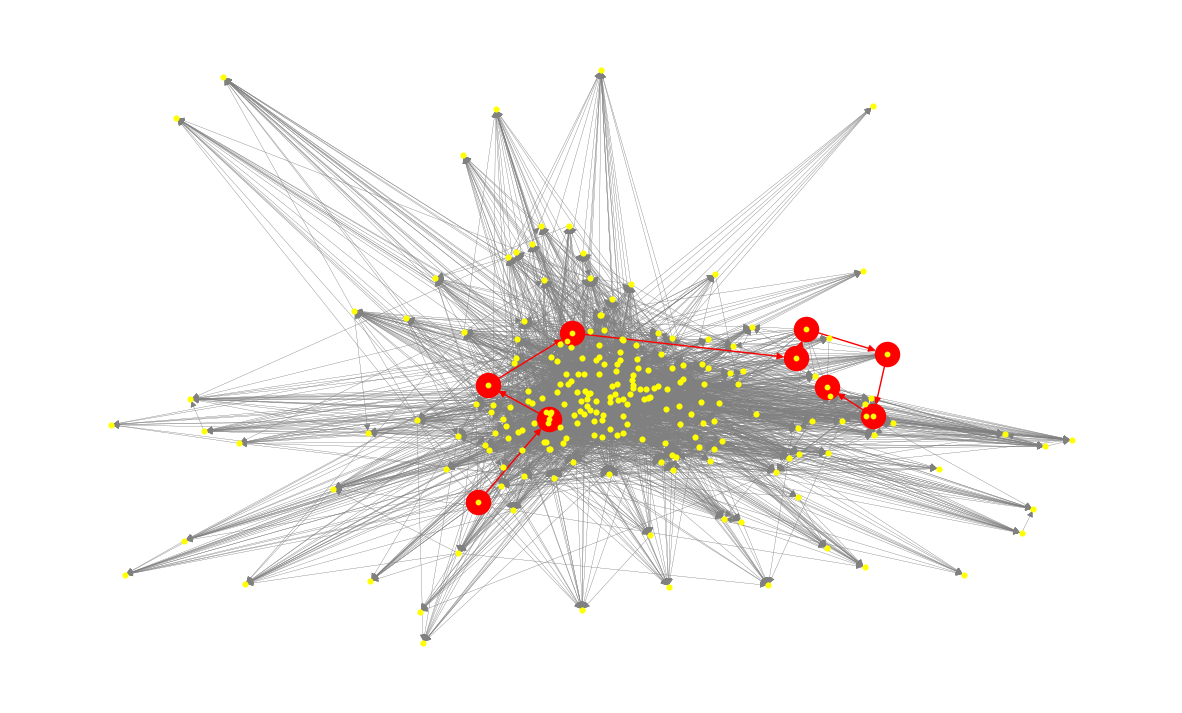

In [135]:
pos = nx.spring_layout(journal, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(journal, pos=pos, ax=ax, **plot_options)
nx.draw_networkx_nodes(journal,pos,nodelist=path,node_color='r')
nx.draw(journal, pos=pos,ax=ax,**plot_options)
nx.draw_networkx_edges(journal,pos,edgelist=path_edges,edge_color='r',width=1)
plt.show()

In [138]:
pos_vox={k:(x,y) for k,x,y in zip(list(journal.nodes),
                                  nx.get_node_attributes(journal, 'x').values(),
                                  nx.get_node_attributes(journal, 'y').values())}

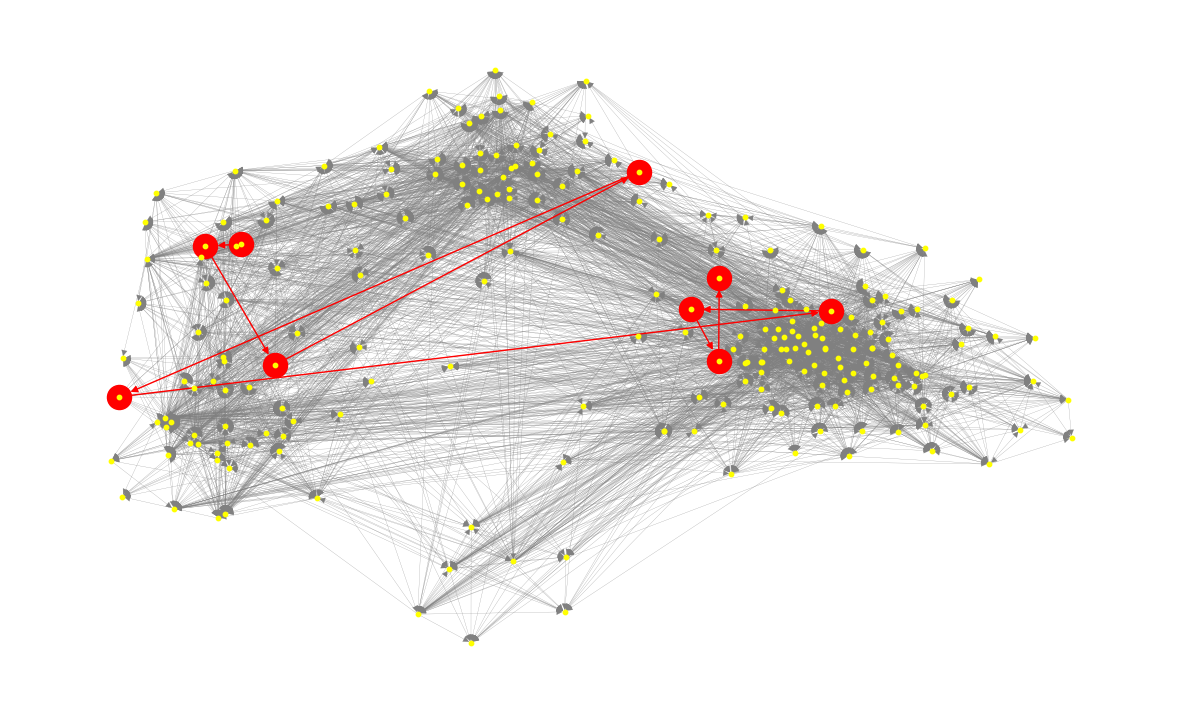

In [139]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")


nx.draw_networkx_nodes(journal,pos_vox,nodelist=path,node_color='r')
nx.draw(journal, pos=pos_vox,ax=ax,**plot_options)
nx.draw_networkx_edges(journal,pos=pos_vox,edgelist=path_edges,edge_color='r',width=1)
plt.show()

<div class="alert-success">

## Ejercicio 6

Luego del paso anterior, ejecute el menú de la Figura 17, seleccionando las TRES medidas indicadas.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/uci_centrality_exer.png" style="width:70%">
<figcaption align = "center"> Figura 17. Opciones para calcular la centralidad en UCINET. 
 </figcaption>
 Fuente: UCINET
</figure>
    
¿Qué diferencias encuentra entre lo que muestra UCINET y se calculó antes en Python? 

_Prepara su respuesta con texto e imagenes de los obtenido en un GoogleDoc_.
</div>